<a href="https://colab.research.google.com/github/dookda/cmu_py499/blob/main/proj_earn_gsv/YOLO8_sky_segmentation_colab_mo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Wed May  8 13:13:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   58C    P8              13W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
!mkdir sky_detect

In [ ]:
!unzip /content/drive/MyDrive/_DATASET/dataset50.zip -d /content/sky_detect

In [10]:
dataDir = os.path.join(os.getcwd(), 'sky_detect')
print(dataDir)

/content/sky_detect


In [ ]:
!rm -r sky_detect/sky.v6i.yolov8/
!rm -r sky_detect/__MACOSX/

In [ ]:
!pip install ultralytics

`pip install pandas ultralytics numpy matplotlib seaborn pytest-warnings PyYAML random Pillow opencv-python`

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

In [ ]:
sns.set(rc={'axes.facecolor': '#ffe4de'}, style='darkgrid')

In [11]:
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 112MB/s]


In [12]:
yamlFilePath = os.path.join(dataDir, 'dataset.yaml')
print(yamlFilePath)

/content/sky_detect/dataset.yaml


In [13]:
results = model.train(
    data=yamlFilePath,
    epochs=50,
    imgsz=640,
    batch=32,
    optimizer='auto',
    lr0=0.0001,
    lrf=0.01,
    dropout=0.25,
    # device='cpu',
    device=0,
    seed=42
)

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/sky_detect/dataset.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 25.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /content/sky_detect/train/labels...:   0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (134217728 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
train: Scanning /content/sky_detect/train/labels... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:01<00:00, 33.06it/s]

train: New cache created: /content/sky_detect/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/sky_detect/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 21.50it/s]

val: New cache created: /content/sky_detect/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.04G      2.886      5.271      3.779      2.209         67        640: 100%|██████████| 2/2 [02:42<00:00, 81.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         10         53    0.00599      0.477     0.0522    0.00779    0.00216      0.123     0.0227    0.00477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.02G      3.011      5.517      3.745       2.23         98        640: 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         10         53    0.00606      0.477     0.0411    0.00587    0.00209      0.123     0.0232    0.00453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.25G      2.888      5.415      3.774      2.085         83        640: 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         10         53    0.00607      0.445     0.0306     0.0055    0.00202      0.152     0.0223    0.00457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.14G      2.699       4.68       3.67      2.208         63        640: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         10         53    0.00569      0.435     0.0535     0.0175    0.00402      0.314     0.0467     0.0138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.82G      1.951      4.094       3.38      1.593         73        640: 100%|██████████| 2/2 [00:04<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         10         53     0.0073      0.548     0.0914     0.0451    0.00464      0.397     0.0526     0.0164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.89G      1.509      3.537       3.21      1.374         87        640: 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         10         53    0.00764       0.59      0.238       0.12    0.00597      0.404      0.226     0.0781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.96G      1.542      3.233      2.956      1.378         78        640: 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         10         53     0.0106      0.646      0.229      0.134    0.00855      0.503      0.216     0.0794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.99G      1.379      2.838      2.598      1.262         74        640: 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         10         53     0.0102      0.636      0.273      0.176    0.00925      0.586      0.287       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.05G      1.435      2.985      2.421      1.264         79        640: 100%|██████████| 2/2 [00:05<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         10         53     0.0121      0.759      0.331      0.185     0.0117      0.697      0.304      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.83G      1.372      2.831      2.116      1.307         45        640: 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         10         53     0.0127       0.81      0.481      0.286     0.0123      0.748      0.457      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.05G      1.239      2.531      1.908      1.187         59        640: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         10         53     0.0127       0.81      0.478       0.31     0.0128      0.768      0.487       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.96G      1.292      2.535      1.806      1.193         68        640: 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


                   all         10         53     0.0135       0.84      0.498       0.32     0.0129        0.8      0.523      0.254

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.83G      1.279      2.608      1.571      1.218         55        640: 100%|██████████| 2/2 [00:12<00:00,  6.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         10         53     0.0134       0.83      0.509      0.312     0.0135      0.819       0.55       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.94G      1.203      2.385      1.499      1.156         88        640: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         10         53     0.0134       0.83      0.475        0.3     0.0136      0.819      0.502      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.06G      1.281      2.951      1.557      1.225         71        640: 100%|██████████| 2/2 [00:09<00:00,  4.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         10         53     0.0131       0.82      0.471      0.298     0.0135      0.819      0.424      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.87G      1.171      2.275      1.574      1.181         40        640: 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         10         53     0.0137       0.84       0.36      0.246     0.0132      0.778      0.346       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.05G      1.206      2.796      1.421      1.141         85        640: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         10         53      0.693       0.35      0.351      0.245      0.734       0.39       0.37      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.95G      1.194      2.387      1.417      1.159         93        640: 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         10         53          1      0.176      0.332      0.242          1      0.176      0.393      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.83G      1.124      2.394      1.313      1.106         79        640: 100%|██████████| 2/2 [00:19<00:00,  9.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         10         53      0.952      0.181      0.471      0.282          1      0.211      0.446      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.07G      1.052        2.1      1.207      1.068         59        640: 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         10         53      0.924      0.218      0.417      0.262      0.962      0.249      0.451      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.01G      1.102      2.238      1.321      1.132         61        640: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         10         53          1      0.215       0.35      0.236          1      0.221      0.394      0.203



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.99G      1.098      2.148      1.131      1.079         99        640: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

                   all         10         53      0.984      0.257      0.359      0.222      0.961      0.244      0.362      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.86G      1.024      2.321      1.176      1.094         71        640: 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all         10         53      0.951      0.245      0.363      0.217      0.902      0.216      0.328      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.95G      1.023      1.952      1.127      1.085         66        640: 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         10         53      0.801      0.116      0.329      0.147      0.697     0.0925      0.273      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.84G      1.073      2.055      1.162      1.102         80        640: 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]

                   all         10         53      0.804      0.108      0.326      0.142      0.803      0.108      0.326      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.97G      1.092       2.04      1.138      1.073         80        640: 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         10         53      0.764      0.263      0.333      0.194      0.855      0.278      0.345      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.84G      1.125      2.319      1.254      1.106         74        640: 100%|██████████| 2/2 [00:15<00:00,  7.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all         10         53      0.784      0.302      0.349       0.21      0.851      0.311      0.351      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.87G      1.008      1.883      1.062      1.058         79        640: 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all         10         53      0.836      0.311      0.383      0.233      0.912      0.302      0.377      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.01G      1.114      1.933       1.13      1.091         73        640: 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all         10         53      0.778      0.338      0.419      0.275      0.848      0.337      0.434      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.89G      1.141       2.18      1.134      1.144         63        640: 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]

                   all         10         53      0.741      0.307      0.399      0.286      0.822      0.351      0.439      0.242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.91G      1.019      2.233      1.041      1.084         77        640: 100%|██████████| 2/2 [00:10<00:00,  5.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         10         53      0.775      0.301       0.41      0.285      0.833      0.358      0.448      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.07G      1.092      1.977       1.08       1.07         75        640: 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all         10         53      0.819      0.311      0.385      0.266      0.817      0.331      0.413      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.03G     0.9888      1.995      1.068      1.049         53        640: 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all         10         53      0.846      0.321      0.402      0.266      0.834      0.341       0.43       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.06G      1.028      1.989       1.04      1.069         68        640: 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all         10         53      0.941      0.311      0.433      0.292      0.945      0.331      0.463      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.77G       0.95      1.918     0.9405      1.014         77        640: 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]

                   all         10         53      0.965      0.319      0.494      0.313      0.957      0.338       0.51      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.01G      1.009      1.846      1.041      1.048         74        640: 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         10         53      0.928      0.321      0.493       0.32      0.918      0.339      0.507      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50       6.1G      1.006      1.928      1.059      1.079         53        640: 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all         10         53      0.899       0.32      0.498        0.3      0.899      0.338      0.515      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.18G      1.002      2.024     0.9596      1.037         91        640: 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.00it/s]

                   all         10         53      0.867      0.313      0.483      0.291       0.87      0.332      0.507      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.92G     0.9911      1.861     0.9886      1.024         68        640: 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all         10         53      0.826      0.321      0.468        0.3      0.824      0.378      0.511      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.83G     0.9421      1.715      0.951      1.079         82        640: 100%|██████████| 2/2 [00:08<00:00,  4.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all         10         53      0.765      0.338      0.496      0.306      0.842      0.407      0.533      0.282


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.51G      1.169      2.107      1.872      1.254         31        640: 100%|██████████| 2/2 [01:36<00:00, 48.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         10         53      0.771      0.326      0.473      0.299      0.828      0.386      0.523      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.52G      1.065      2.185      1.637      1.135         29        640: 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         10         53      0.915      0.309      0.486      0.307      0.788      0.341      0.479      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.21G     0.9767      2.063      1.366      1.052         32        640: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         10         53      0.772      0.317      0.477      0.302      0.811      0.327      0.463      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.49G     0.9877      2.071      1.338      1.066         27        640: 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all         10         53      0.715      0.272      0.418      0.282      0.796      0.294       0.44      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.49G     0.9761       2.04      1.245      1.025         38        640: 100%|██████████| 2/2 [00:12<00:00,  6.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         10         53       0.79      0.312       0.46      0.293      0.796      0.291       0.44      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.52G      0.931      2.025      1.276      1.043         38        640: 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

                   all         10         53      0.884      0.329      0.534      0.313       0.85      0.299      0.481       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.52G      1.029      1.831      1.313       1.06         24        640: 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all         10         53       0.88      0.332      0.518       0.33      0.868      0.322      0.496      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50       5.5G     0.9001      1.824       1.13      1.024         29        640: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         10         53      0.832      0.301      0.509      0.338      0.857      0.323      0.505      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50       5.5G      0.997      1.793      1.199      1.072         26        640: 100%|██████████| 2/2 [00:03<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]

                   all         10         53      0.831      0.305      0.547      0.336      0.859      0.331      0.534      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.51G     0.8682       2.01      1.091      1.001         37        640: 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all         10         53      0.867      0.321      0.571      0.349      0.866       0.34       0.55      0.316



50 epochs completed in 0.130 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


                   all         10         53      0.868      0.321      0.571      0.349      0.866       0.34      0.549      0.316
                   sky         10         11      0.803      0.727      0.744      0.677        0.9      0.815      0.807      0.594
                  tree         10         34        0.8      0.235      0.478      0.218        0.7      0.205      0.435      0.186
              building         10          8          1          0      0.491      0.154          1          0      0.406      0.168
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/train


In [14]:
bestModelPath = '/content/runs/segment/train/weights/best.pt'
bestModel = YOLO(bestModelPath)


image 1/1 /content/sky_detect/test/fe_6tTCFHprCsi3Vrl50AJl8A.jpg: 640x640 (no detections), 13.3ms
Speed: 6.5ms preprocess, 13.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


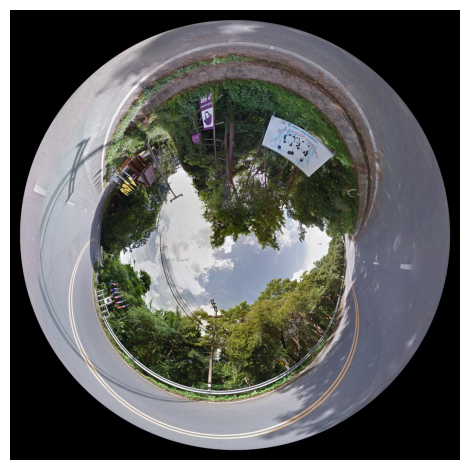


image 1/1 /content/sky_detect/test/fe_0mINwjtGwaCNyCw4cGYRuQ.jpg: 640x640 (no detections), 12.0ms
Speed: 4.2ms preprocess, 12.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


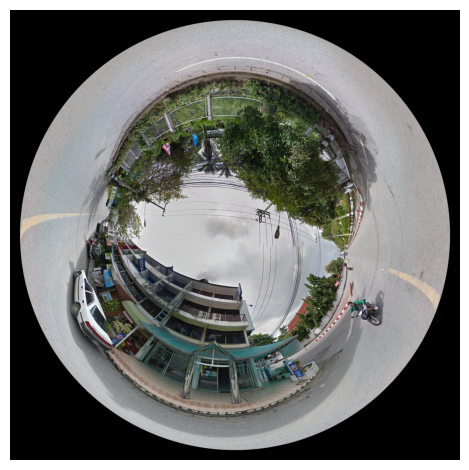


image 1/1 /content/sky_detect/test/fe_Wta9LmhU8qRLMEl5WozbrQ.jpg: 640x640 (no detections), 12.1ms
Speed: 4.2ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


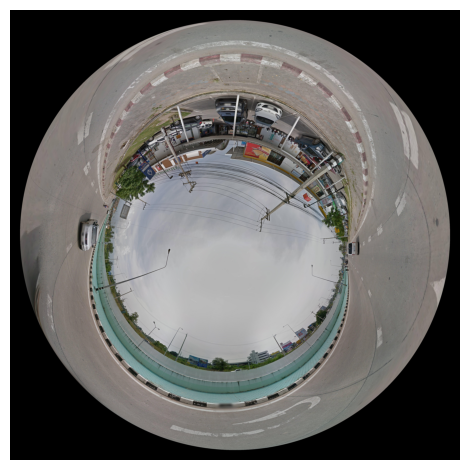

In [20]:
validImagePath = os.path.join(dataDir, 'test')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages)]

for i in imageFiles:
  imagePath = os.path.join(validImagePath, i)
  results = bestModel.predict(source=imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  plt.imshow(annotatedImageRGB)
  plt.axis('off')
  plt.tight_layout()
  plt.show()